[-3.82181266e-09 -7.64576499e-05 -1.52909944e-04 ...  3.38890423e-04
  4.10526745e-04  4.82136450e-04]


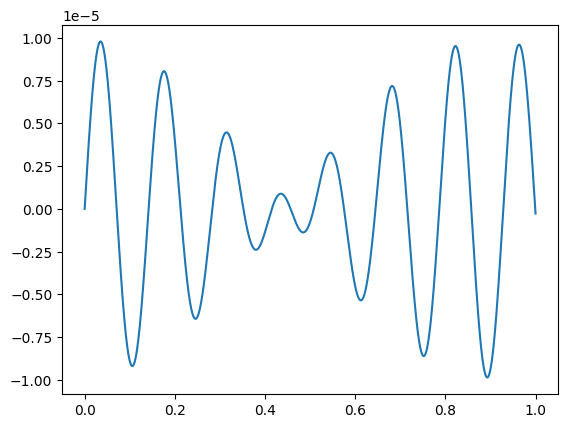

In [62]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym

def flujo_mag(t):       
    flujo= (np.pi*(0.05**2)) *0.05*np.cos(3.5*t) *np.cos(2*np.pi*7*t)
    return flujo

def Dflujo(f, t, h=1e-8):
    d = (flujo_mag(t+h) - flujo_mag(t))/h
    return d

print(Dflujo(f,t))

def corriente(t):
    I= (-1*Dflujo(flujo_mag, t))/1750
    return I

t= np.linspace(0, 1, 10000) 
I= corriente(t)
plt.plot(t, I)
plt.show()

In [63]:
#raíces
def newtonraphson(f,df,xn,itmax=100,precision=1e-8):
    error=1
    it=0
    while error > precision and it < itmax:
        try:
            xn1=xn-(f(xn)/df(f,xn))
            error=np.abs(f(xn)/df(f,xn))
        except ZeroDivisionError:
            print("división por cero")
        xn= xn1 
        it+=1
    if it==itmax:
        return False
    else:
        return xn

raiz= newtonraphson(flujo_mag,Dflujo,1)
print(raiz)

def todas_las_raices(x,tolerancia=20):
    raices=np.array([])
    for i in x:
        raiz=newtonraphson(flujo_mag,Dflujo,i)
        if raiz != False:
            if len(raices) <= 2:
                raices=np.append(raices,raiz)

    raices.sort()
    return raices


raices=todas_las_raices(t)
print(raices)

1.75
[2.89285714e+00 5.17857143e+00 1.02752071e+05]
